In [1]:
!pip install transformers pillow torch torchvision sentence-transformers
import torch
from PIL import Image
import pandas as pd
from transformers import CLIPProcessor, CLIPModel
from sentence_transformers import SentenceTransformer
import os
from tqdm import tqdm

c:\Users\aks\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [5]:
# Load CSV file containing image descriptions and keywords
df = pd.read_csv(r"C:\Users\aks\Desktop\zigguratss\ML Model\image_descriptions.csv")

# Function to load and preprocess images
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return clip_processor(images=image, return_tensors="pt")['pixel_values'][0]

# Load and preprocess all images
images = {}
folder_path = r"C:\Users\aks\Desktop\zigguratss\ML Model\artwork-dataset"  # Adjust this to your folder path
for _, row in tqdm(df.iterrows(), total=len(df)):
    image_id = row['ImageID']
    image_file = row['Image']  # This should be the image filename in the folder
    image_path = os.path.join(folder_path, image_file)
    try:
        images[image_id] = load_image(image_path)
    except FileNotFoundError:
        print(f"Image {image_path} not found.")

# Preprocess text descriptions and keywords
texts = df['Description'] + " " + df['Keywords']
text_embeddings = bert_model.encode(texts.tolist())

  6%|▌         | 60/962 [00:00<00:06, 148.42it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_0.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_1.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_10.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_100.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_101.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_102.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_103.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_104.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_105.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_106.jpg not found.
Image C:/conten

 14%|█▍        | 133/962 [00:00<00:03, 249.10it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_184.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_185.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_186.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_187.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_188.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_189.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_19.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_190.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_191.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_192.jpg not found.
Image C:/co

 29%|██▊       | 276/962 [00:01<00:01, 406.70it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_252.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_253.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_254.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_255.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_256.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_257.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_258.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_259.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_26.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_260.jpg not found.
Image C:/co

 40%|███▉      | 383/962 [00:01<00:01, 471.05it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_348.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_349.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_35.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_350.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_351.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_352.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_353.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_354.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_355.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_356.jpg not found.
Image C:/co

 47%|████▋     | 454/962 [00:01<00:00, 540.39it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_444.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_445.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_446.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_447.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_448.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_449.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_45.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_450.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_451.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_452.jpg not found.
Image C:/co

 60%|██████    | 578/962 [00:01<00:00, 563.61it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_558.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_559.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_56.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_560.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_561.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_562.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_563.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_564.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_565.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_566.jpg not found.
Image C:/co

 72%|███████▏  | 691/962 [00:01<00:00, 525.03it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_661.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_662.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_663.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_664.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_665.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_666.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_667.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_668.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_669.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_67.jpg not found.
Image C:/co

 85%|████████▍ | 817/962 [00:01<00:00, 563.27it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_778.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_779.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_78.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_780.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_781.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_782.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_783.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_784.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_785.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_786.jpg not found.
Image C:/co

 96%|█████████▋| 927/962 [00:02<00:00, 481.50it/s]

Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_880.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_881.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_882.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_883.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_884.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_885.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_886.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_887.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_888.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_889.jpg not found.
Image C:/c

100%|██████████| 962/962 [00:02<00:00, 414.31it/s]


Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_966.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_967.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_968.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_969.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_97.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_970.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_98.jpg not found.
Image C:/content/drive/MyDrive/zigguratss-artwork-dataset/artwork-dataset/image_99.jpg not found.


In [10]:
%matplotlib inline

In [7]:
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt

In [11]:
from IPython.display import display
from PIL import Image as PILImage
import matplotlib.pyplot as plt

def search_and_display_artwork(query, top_k=5):
    # Encode the query using CLIP
    inputs = processor(text=query, return_tensors="pt", padding=True, truncation=True)
    query_embedding = model.get_text_features(**inputs)

    # Encode the query using BERT
    bert_query_embedding = bert_model.encode([query])

    # Combine CLIP and BERT embeddings
    combined_query_embedding = torch.cat([query_embedding, torch.tensor(bert_query_embedding)], dim=1)

    similarities = []
    for image_id, image in images.items():
        # Get image embedding using CLIP
        image_embedding = model.get_image_features(image.unsqueeze(0))

        # Get text embedding for the corresponding description and keywords
        text_embedding = torch.tensor(text_embeddings[df[df['ImageID'] == image_id].index[0]]).unsqueeze(0)

        # Combine image and text embeddings
        combined_embedding = torch.cat([image_embedding, text_embedding], dim=1)

        # Calculate similarity
        similarity = torch.nn.functional.cosine_similarity(combined_query_embedding, combined_embedding)
        similarities.append((image_id, similarity.item()))

    # Sort by similarity and get top_k results
    top_results = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_k]

    # Display results
    fig, axs = plt.subplots(1, top_k, figsize=(20, 4))
    for i, (image_id, similarity) in enumerate(top_results):
        image_path = df[df['ImageID'] == image_id]['Image'].values[0]
        img = PILImage.open(image_path)
        if top_k == 1:
            axs.imshow(img)
            axs.axis('off')
            axs.set_title(f"ID: {image_id}\nSim: {similarity:.4f}")
        else:
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(f"ID: {image_id}\nSim: {similarity:.4f}")

    plt.tight_layout()
    plt.show()

    return top_results



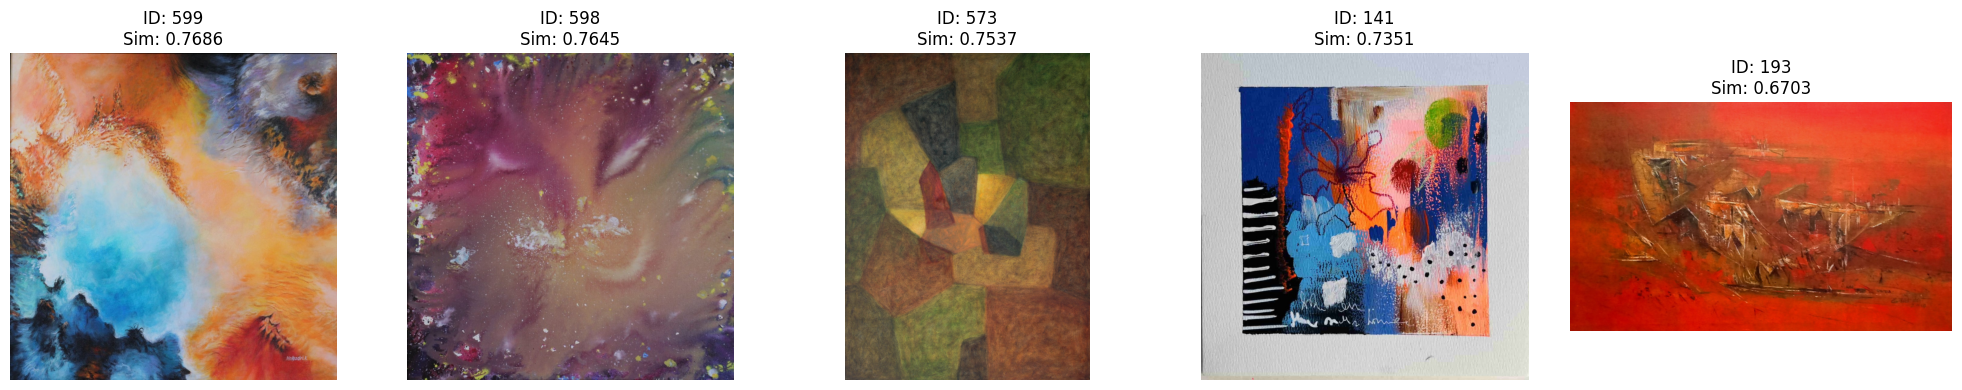

Image ID: 599, Similarity: 0.7686
Image ID: 598, Similarity: 0.7645
Image ID: 573, Similarity: 0.7537
Image ID: 141, Similarity: 0.7351
Image ID: 193, Similarity: 0.6703


In [12]:
# Example usage
results = search_and_display_artwork("Abstract painting with vibrant colors")
for image_id, similarity in results:
    print(f"Image ID: {image_id}, Similarity: {similarity:.4f}")

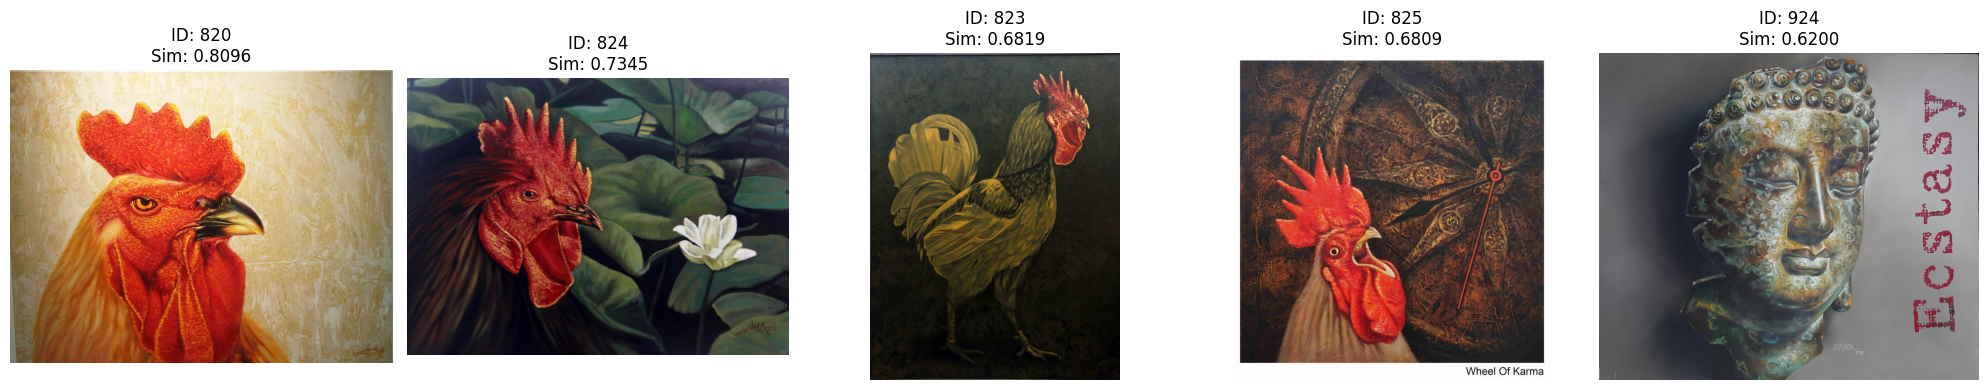

Image ID: 820, Similarity: 0.8096
Image ID: 824, Similarity: 0.7345
Image ID: 823, Similarity: 0.6819
Image ID: 825, Similarity: 0.6809
Image ID: 924, Similarity: 0.6200


In [13]:
# Example usage
results = search_and_display_artwork("painting of a rooster")
for image_id, similarity in results:
    print(f"Image ID: {image_id}, Similarity: {similarity:.4f}")

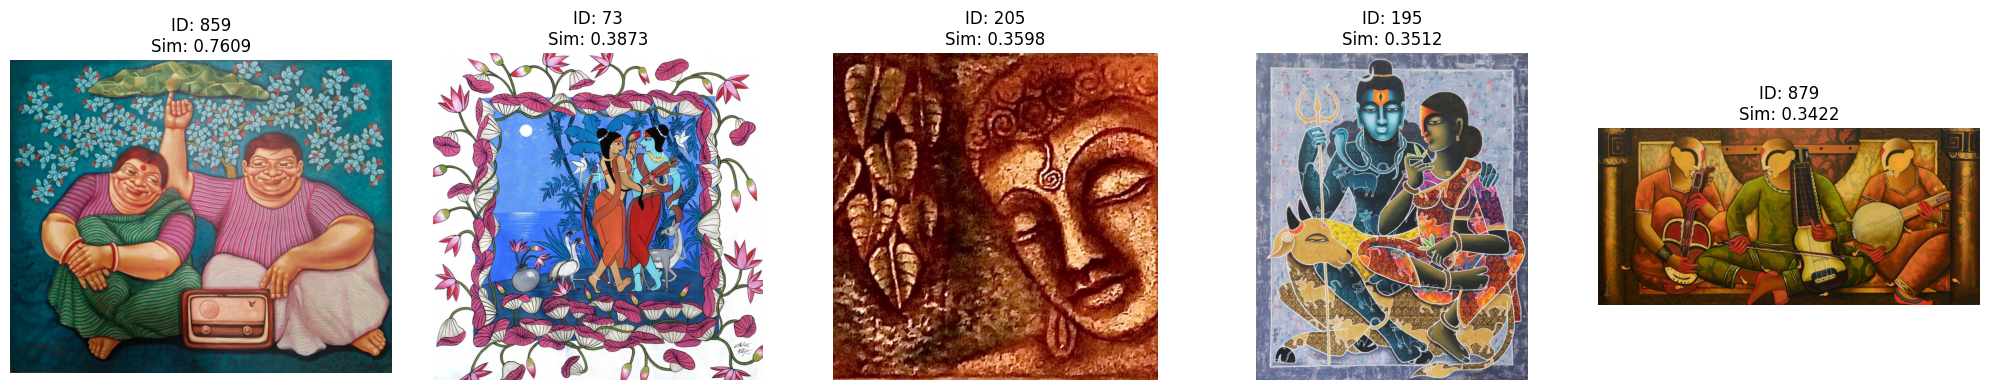

Image ID: 859, Similarity: 0.7609
Image ID: 73, Similarity: 0.3873
Image ID: 205, Similarity: 0.3598
Image ID: 195, Similarity: 0.3512
Image ID: 879, Similarity: 0.3422


In [15]:
# Example usage
results = search_and_display_artwork("couple with radio ")
for image_id, similarity in results:
    print(f"Image ID: {image_id}, Similarity: {similarity:.4f}")

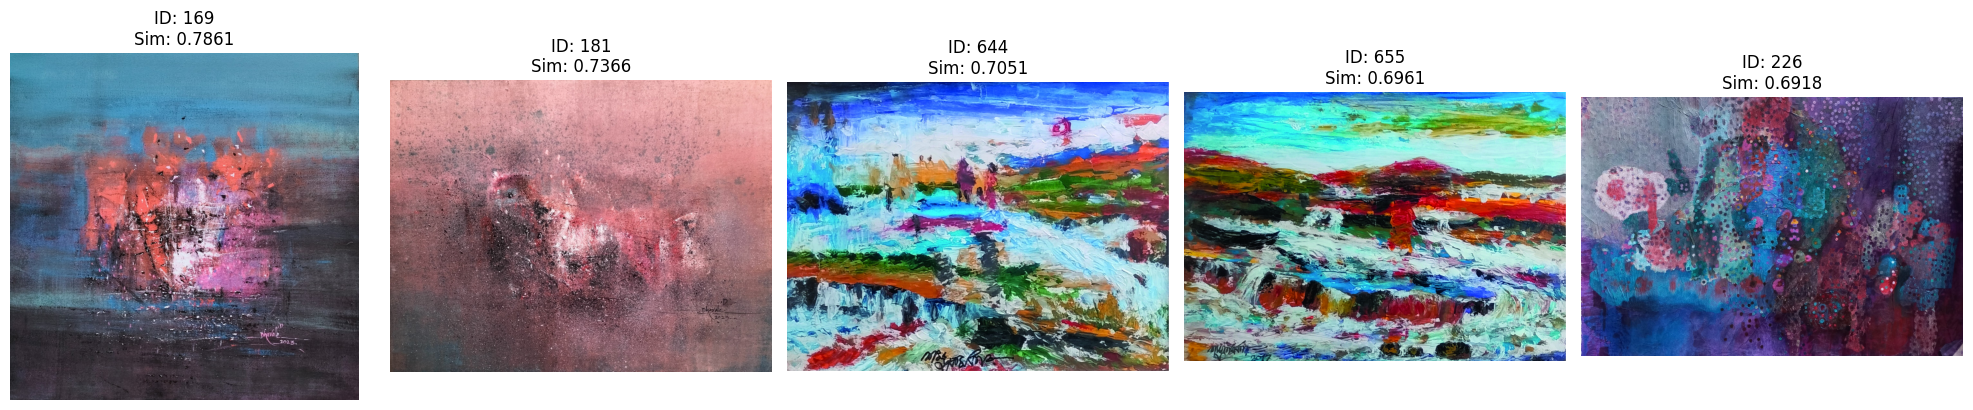

Image ID: 169, Similarity: 0.7861
Image ID: 181, Similarity: 0.7366
Image ID: 644, Similarity: 0.7051
Image ID: 655, Similarity: 0.6961
Image ID: 226, Similarity: 0.6918


In [17]:
# Example usage
results = search_and_display_artwork("painting of blue and pink sky")
for image_id, similarity in results:
    print(f"Image ID: {image_id}, Similarity: {similarity:.4f}")